<a href="https://colab.research.google.com/github/izzamokhtar/urbanrent/blob/main/notebook/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 200)

import re
import time
import datetime
import smtplib
import json
from tqdm.notebook import tqdm, trange
import time    # to be used in loop iterations

!jupyter nbextension enable --py widgetsnbextension #enabling progress bar

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Data Understanding

In [ ]:
#read it back
df = pd.read_csv('/content/drive/MyDrive/FYP B IZZA/mudah-apartment-kl-selangor.csv')
df.head(3).T

,0,1,2
ads_id,100323185,100203973,100323128
prop_name,The Hipster @ Taman Desa,Segar Courts,Pangsapuri Teratak Muhibbah 2
completion_year,2022.0,NaN,NaN
monthly_rent,RM 4 200 per month,RM 2 300 per month,RM 1 000 per month
location,Kuala Lumpur - Taman Desa,Kuala Lumpur - Cheras,Kuala Lumpur - Taman Desa
property_type,Condominium,Condominium,Apartment
rooms,5,3,3
parking,2.0,1.0,NaN
bathroom,6.0,2.0,2.0
size,1842 sq.ft.,1170 sq.ft.,650 sq.ft.


In [ ]:
#Data Description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19983 entries, 0 to 19982
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19983 non-null  int64  
 1   prop_name              19035 non-null  object 
 2   completion_year        10802 non-null  float64
 3   monthly_rent           19981 non-null  object 
 4   location               19983 non-null  object 
 5   property_type          19983 non-null  object 
 6   rooms                  19977 non-null  object 
 7   parking                14284 non-null  float64
 8   bathroom               19977 non-null  float64
 9   size                   19983 non-null  object 
 10  furnished              19978 non-null  object 
 11  facilities             17775 non-null  object 
 12  additional_facilities  14038 non-null  object 
 13  region                 19983 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

In [ ]:
rows = df.count()[0]
rows = len(df.index)
rows = df.shape[0]
rows = len(df.axes[0])

<ipython-input-8-20e1d0b1a3ee>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rows = df.count()[0]


In [ ]:
#check any duplication
df.duplicated().sum()

0

In [ ]:
# prompt: how to clean duplicate data

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates are removed
#print(df.duplicated().sum())

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# prompt: how to save the clean data

# Save the cleaned DataFrame to a new CSV file in your Google Drive
df.to_csv('/content/drive/MyDrive/FYP B IZZA/mudah-apartment-kl-selangor_cleaned.csv', index=False)

In [ ]:
#reload the data
df = pd.read_csv("/content/drive/MyDrive/FYP B IZZA/mudah-apartment-kl-selangor_cleaned.csv")

In [ ]:
#duplicate check
df.duplicated().sum()

0

In [ ]:
import re

#removing RM from monthly rent
df['monthly_rent'] = df['monthly_rent'].astype(str).apply(lambda x: int(re.search(r'RM (.*?) per', x).group(1).replace(' ', '')) if re.search(r'RM (.*?) per', x) else x)
df = df.rename(columns={'monthly_rent': 'monthly_rent_rm'})

In [ ]:
#extracting near KTM/LRT from the additional facilities
def extract_near_ktm_lrt(text):
    pattern = re.compile(r'\bNear KTM/LRT\b')
    try:
        match = pattern.search(text)
        if match:
            return 'yes'
        return 'no'
    except TypeError:
        return text

In [ ]:
df['nearby_railways'] = df.additional_facilities.apply(lambda x: extract_near_ktm_lrt(x))
df.head(4).T

,0,1,2,3
ads_id,100323185,100203973,100323128,100191767
prop_name,The Hipster @ Taman Desa,Segar Courts,Pangsapuri Teratak Muhibbah 2,Sentul Point Suite Apartment
completion_year,2022.0,NaN,NaN,2020.0
monthly_rent_rm,4200,2300,1000,1700
location,Kuala Lumpur - Taman Desa,Kuala Lumpur - Cheras,Kuala Lumpur - Taman Desa,Kuala Lumpur - Sentul
property_type,Condominium,Condominium,Apartment,Apartment
rooms,5,3,3,2
parking,2.0,1.0,NaN,1.0
bathroom,6.0,2.0,2.0,2.0
size,1842 sq.ft.,1170 sq.ft.,650 sq.ft.,743 sq.ft.



Median:
Nearby KTM/LRT: RM1500
Not nearby KTM/LRT: RM1400
      


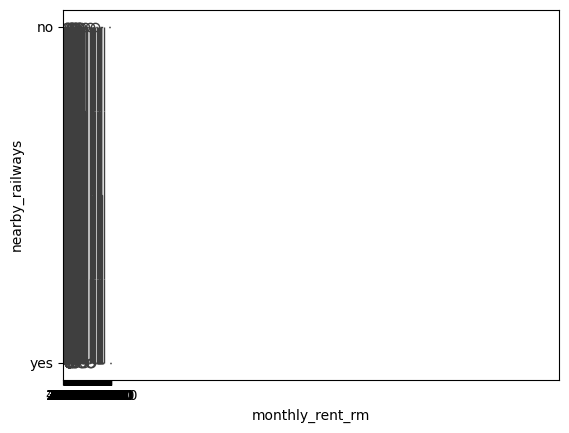

In [ ]:
#| label: fig-nearbyktm
#| fig-cap: Boxplot between Nearby KTM/LRT or Not

sns.boxplot(data=df, x='monthly_rent_rm', y='nearby_railways')
plt.xlim(0,4000);

near_ktmlrt = df.query(" nearby_railways == 'yes' ")
not_near_ktmlrt = df.query(" nearby_railways == 'no' ")

print(f"""
Median:
Nearby KTM/LRT: RM{near_ktmlrt.monthly_rent_rm.median():.0f}
Not nearby KTM/LRT: RM{not_near_ktmlrt.monthly_rent_rm.median():.0f}
      """)

In [ ]:
#sanity check
df[df['prop_name'] == 'Majestic Maxim'][['nearby_railways']].value_counts()

,count
nearby_railways,
yes,166
no,24


In [ ]:
df.isna().sum()

,0
ads_id,0
prop_name,948
completion_year,9181
monthly_rent_rm,0
location,0
property_type,0
rooms,6
parking,5699
bathroom,6
size,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19983 entries, 0 to 19982
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19983 non-null  int64  
 1   prop_name              19035 non-null  object 
 2   completion_year        10802 non-null  float64
 3   monthly_rent_rm        19983 non-null  object 
 4   location               19983 non-null  object 
 5   property_type          19983 non-null  object 
 6   rooms                  19977 non-null  object 
 7   parking                14284 non-null  float64
 8   bathroom               19977 non-null  float64
 9   size                   19983 non-null  object 
 10  furnished              19978 non-null  object 
 11  facilities             17775 non-null  object 
 12  additional_facilities  14038 non-null  object 
 13  region                 19983 non-null  object 
 14  nearby_railways        14038 non-null  object 
dtypes:

In [ ]:
#converting rooms from object to int64
df['rooms'] = pd.to_numeric(df['rooms'], downcast='integer', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19983 entries, 0 to 19982
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19983 non-null  int64  
 1   prop_name              19035 non-null  object 
 2   completion_year        10802 non-null  float64
 3   monthly_rent_rm        19983 non-null  object 
 4   location               19983 non-null  object 
 5   property_type          19983 non-null  object 
 6   rooms                  19975 non-null  float64
 7   parking                14284 non-null  float64
 8   bathroom               19977 non-null  float64
 9   size                   19983 non-null  object 
 10  furnished              19978 non-null  object 
 11  facilities             17775 non-null  object 
 12  additional_facilities  14038 non-null  object 
 13  region                 19983 non-null  object 
 14  nearby_railways        14038 non-null  object 
dtypes:

In [ ]:
#dropping sq.ft from size
df['size'] = df['size'].apply(lambda x: int(re.search(r'(.*?) sq', x).group(1).replace(' ', '')))
df = df.rename(columns={'size': 'size_sqft'})

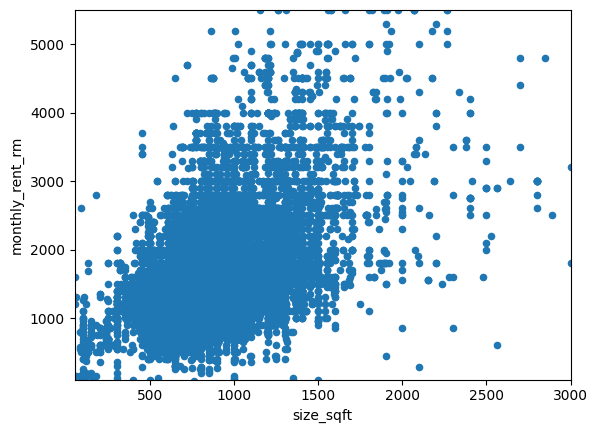

In [ ]:
#Outlier Removal
#To remove some unexplainable data such as 0 monthly rent, 0 size, the rent that is way too old (1970), including the monthly rent that is way too high and/or size too big.

#| label: fig-size-rent
#| fig-cap: "Monthly Rent"

df[['size_sqft', 'monthly_rent_rm']].plot(kind='scatter', x='size_sqft', y='monthly_rent_rm');
plt.ylim(100,5500) #batas harga rent
plt.xlim(50,3000)  #batas size
plt.show()

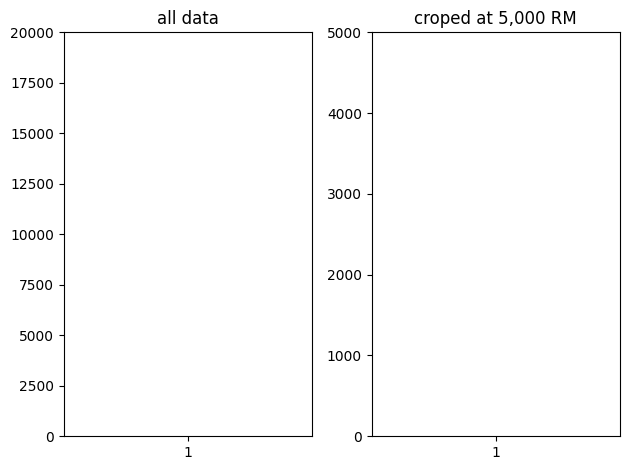

In [ ]:
#| label: fig-compare-rent
#| fig-cap: "Comparison between Different Scale"

# Convert 'monthly_rent_rm' column to numeric
df['monthly_rent_rm'] = pd.to_numeric(df['monthly_rent_rm'], errors='coerce')

fig, axs = plt.subplots(1,2)
axs[0].boxplot(data=df, x='monthly_rent_rm')
axs[0].set_ylim(0,20000)
axs[0].set_title('all data')

axs[1].boxplot(data=df, x='monthly_rent_rm')
axs[1].set_ylim(0,5000)
axs[1].set_title('croped at 5,000 RM')

plt.tight_layout()
plt.show()

In [ ]:
#removing all rows with monthly rent above 5500 RM and below 100RM
dfx = df.query(" monthly_rent_rm > 100 & monthly_rent_rm < 5500 ")
dfx.describe()

,ads_id,completion_year,monthly_rent_rm,rooms,parking,bathroom,size_sqft
count,1.980000e+04,10699.000000,19800.000000,19794.000000,14145.000000,19796.000000,1.980000e+04
mean,9.971108e+07,2014.851388,1564.744545,2.672375,1.411241,1.878410,5.960487e+03
std,3.489705e+06,6.742338,710.937121,0.797813,0.561088,0.518821,7.106627e+05
min,1.652551e+07,1977.000000,110.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,9.984081e+07,2013.000000,1100.000000,2.000000,1.000000,2.000000,7.500000e+02
50%,1.002139e+08,2017.000000,1400.000000,3.000000,1.000000,2.000000,8.830000e+02
75%,1.006192e+08,2020.000000,1800.000000,3.000000,2.000000,2.000000,1.033000e+03
max,1.008546e+08,2025.000000,5499.000000,10.000000,10.000000,8.000000,1.000000e+08


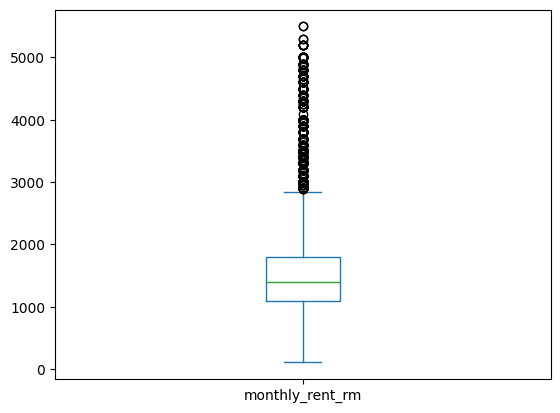

In [ ]:
#sanity check
dfx.monthly_rent_rm.plot(kind='box', x='monthly_rent_rm');

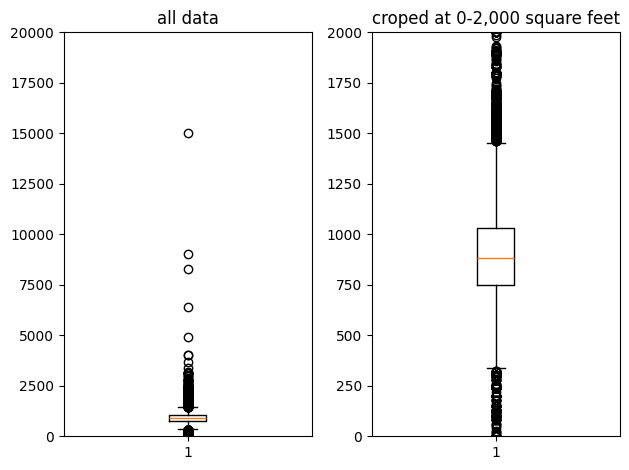

In [ ]:
#in term of size

#| label: fig-size-comparison
#| fig-cap: "Raw Data Size sq.ft"

fig, axs = plt.subplots(1,2)
axs[0].boxplot(data=dfx, x='size_sqft')
axs[0].set_ylim(0,20000)
axs[0].set_title('all data')

axs[1].boxplot(data=dfx, x='size_sqft')
axs[1].set_ylim(0,2000)
axs[1].set_title('croped at 0-2,000 square feet')

plt.tight_layout()
plt.show()

In [ ]:
#removing outliers below 500, and higher than 3000 sqft and below 50 sqft
dfx = \
(dfx.query(" size_sqft > 50 & size_sqft < 3000 ")
 # .size_sqft
 # .plot(kind='box')
)
dfx

,ads_id,prop_name,completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,nearby_railways
0,100323185,The Hipster @ Taman Desa,2022.0,4200.0,Kuala Lumpur - Taman Desa,Condominium,5.0,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swimming Pool, Parking, Lift, Barbeque area, Multipurpose hall, Jogging Track","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,no
1,100203973,Segar Courts,NaN,2300.0,Kuala Lumpur - Cheras,Condominium,3.0,1.0,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, Jogging Track, Swimming Pool, Gymnasium, Lift, Sauna","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,yes
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Kuala Lumpur - Taman Desa,Apartment,3.0,NaN,2.0,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,NaN
3,100191767,Sentul Point Suite Apartment,2020.0,1700.0,Kuala Lumpur - Sentul,Apartment,2.0,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Court, Security, Minimart, Gymnasium, Lift","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,yes
4,97022692,Arte Mont Kiara,NaN,1299.0,Kuala Lumpur - Mont Kiara,Service Residence,1.0,1.0,1.0,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track",Air-Cond,Kuala Lumpur,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,100493687,Pangsapuri Gapura Bayu,NaN,1200.0,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpose hall, Playground, Jogging Track",Near KTM/LRT,Selangor,yes
19979,100371347,BSP 21,2018.0,1300.0,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swimming Pool, Tennis Court, Sauna","Air-Cond, Cooking Allowed",Selangor,no
19980,100493228,Ameera Residence,NaN,1350.0,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Multipurpose hall","Air-Cond, Cooking Allowed, Washing Machine",Selangor,no
19981,100235153,The Arc @ Cyberjaya,NaN,1200.0,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Sauna, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track, Tennis Court, Squash Court","Cooking Allowed, Washing Machine",Selangor,no


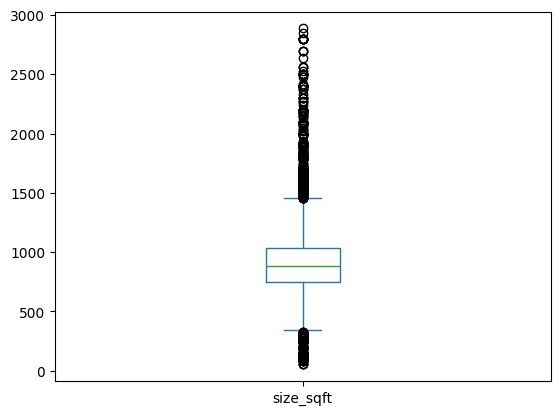

In [ ]:
#sanity check
dfx.size_sqft.plot(kind='box');

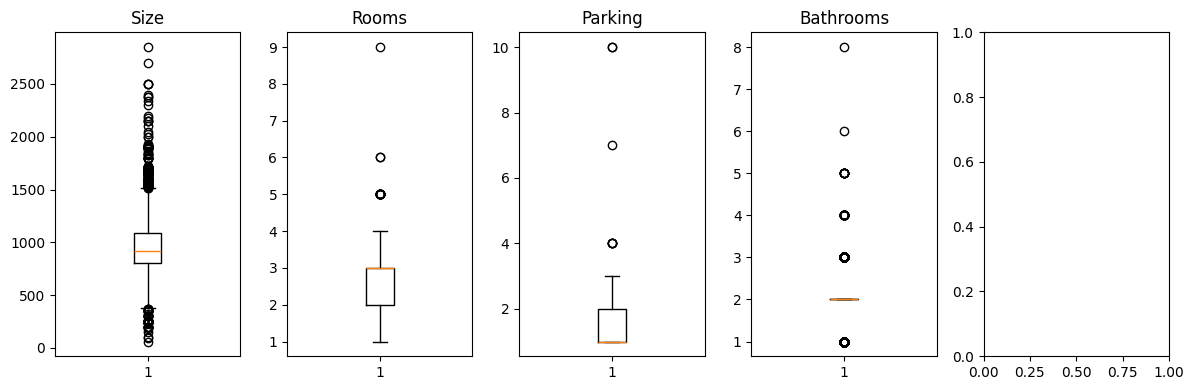

In [ ]:
#| label: fig-complete-outliers
#| fig-cap: "Final Data after Outlier Removal"

fig, axs = plt.subplots(1,5, figsize=(12,4))
axs[0].boxplot(data=dfx.dropna(), x='size_sqft')
axs[1].boxplot(data=dfx.dropna(), x='rooms')
axs[2].boxplot(data=dfx.dropna(), x='parking')
axs[3].boxplot(data=dfx.dropna(), x='bathroom')
# axs[4].boxplot(data=dfx.dropna(), x='completion_year')

axs[0].set_title('Size')
axs[1].set_title('Rooms')
axs[2].set_title('Parking')
axs[3].set_title('Bathrooms')
# axs[4].set_title('Completion Year')

plt.tight_layout()
plt.show()

In [ ]:
#Data Preprocessing

def extractInputOutput(data,
                       output_column_name):

    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)

    return input_data, output_data

In [ ]:
X, y = extractInputOutput(data=dfx, output_column_name='monthly_rent_rm')

In [ ]:
X

,ads_id,prop_name,completion_year,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,nearby_railways
0,100323185,The Hipster @ Taman Desa,2022.0,Kuala Lumpur - Taman Desa,Condominium,5.0,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swimming Pool, Parking, Lift, Barbeque area, Multipurpose hall, Jogging Track","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,no
1,100203973,Segar Courts,NaN,Kuala Lumpur - Cheras,Condominium,3.0,1.0,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, Jogging Track, Swimming Pool, Gymnasium, Lift, Sauna","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,yes
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,Kuala Lumpur - Taman Desa,Apartment,3.0,NaN,2.0,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,NaN
3,100191767,Sentul Point Suite Apartment,2020.0,Kuala Lumpur - Sentul,Apartment,2.0,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Court, Security, Minimart, Gymnasium, Lift","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,yes
4,97022692,Arte Mont Kiara,NaN,Kuala Lumpur - Mont Kiara,Service Residence,1.0,1.0,1.0,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track",Air-Cond,Kuala Lumpur,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,100493687,Pangsapuri Gapura Bayu,NaN,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpose hall, Playground, Jogging Track",Near KTM/LRT,Selangor,yes
19979,100371347,BSP 21,2018.0,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swimming Pool, Tennis Court, Sauna","Air-Cond, Cooking Allowed",Selangor,no
19980,100493228,Ameera Residence,NaN,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Multipurpose hall","Air-Cond, Cooking Allowed, Washing Machine",Selangor,no
19981,100235153,The Arc @ Cyberjaya,NaN,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Sauna, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track, Tennis Court, Squash Court","Cooking Allowed, Washing Machine",Selangor,no


In [ ]:
y

,monthly_rent_rm
0,4200.0
1,2300.0
2,1000.0
3,1700.0
4,1299.0
...,...
19978,1200.0
19979,1300.0
19980,1350.0
19981,1200.0


In [ ]:
#Train Test Split Data

#import libraries
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [ ]:
#sanity check
len(X_test)/len(X)

0.20004048378118516

In [ ]:
#sanity check
X_train

,ads_id,prop_name,completion_year,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,nearby_railways
3921,99637986,Mercu Summer Suites @ Kuala Lumpur,2015.0,Kuala Lumpur - KL City,Service Residence,1.0,NaN,1.0,550,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Sauna, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,yes
16504,100644616,Liberty Tower @ i-City,NaN,Selangor - I-City,Condominium,1.0,NaN,1.0,466,Fully Furnished,NaN,NaN,Selangor,NaN
10042,100853493,Utropolis Urbano,2018.0,Selangor - Shah Alam,Apartment,2.0,1.0,1.0,800,Fully Furnished,"Swimming Pool, Lift, Barbeque area, Parking, Security, Sauna, Gymnasium, Squash Court, Jogging Track, Playground, Club house, Minimart, Tennis Court, Multipurpose hall",NaN,Selangor,NaN
4830,100048603,Anggun Residences,2018.0,Kuala Lumpur - KL City,Service Residence,1.0,1.0,1.0,751,Fully Furnished,"Club house, Squash Court, Gymnasium, Tennis Court, Playground, Parking, Lift, Security","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,no
10895,100832987,Desa Idaman Residences,NaN,Selangor - Puchong,Apartment,3.0,1.0,2.0,1027,Partially Furnished,NaN,NaN,Selangor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13620,100757170,Cyberia Crescent 2,2007.0,Selangor - Cyberjaya,Condominium,3.0,2.0,2.0,1050,Partially Furnished,"Swimming Pool, Security, Parking, Playground, Gymnasium, Minimart, Lift","Washing Machine, Air-Cond",Selangor,no
7901,99857348,PPR Kampung Muhibbah,NaN,Kuala Lumpur - Bukit Jalil,Flat,3.0,NaN,2.0,650,Not Furnished,Minimart,"Near KTM/LRT, Washing Machine",Kuala Lumpur,yes
15568,100686352,Intana Ria,NaN,Selangor - Bangi,Apartment,3.0,1.0,2.0,850,Partially Furnished,"Parking, Security, Playground, Swimming Pool, Multipurpose hall",NaN,Selangor,NaN
17941,100586401,Alami Residensi,NaN,Selangor - Shah Alam,Condominium,3.0,2.0,2.0,1080,Partially Furnished,"Security, Swimming Pool, Multipurpose hall",NaN,Selangor,NaN


In [ ]:
print(dfx.location.nunique())
print(X_train.location.nunique())
print(X_test.location.nunique())

132
129
117


In [ ]:
print(dfx.property_type.nunique())
print(X_train.property_type.nunique())
print(X_test.property_type.nunique())

10
9
9


In [ ]:
print(set(X_train.furnished.to_list()) - set(X_test.furnished.to_list()))
print(set(X_train.location.to_list()) - set(X_test.location.to_list()))
print(set(X_train.property_type.to_list()) - set(X_test.property_type.to_list()))
print(set(X_train.nearby_railways.to_list()) - set(X_test.nearby_railways.to_list()))

{nan}
{'Kuala Lumpur - KL Eco City', 'Kuala Lumpur - Damansara', 'Selangor - Salak Tinggi', 'Selangor - Telok Panglima Garang', 'Selangor - Pulau Indah (Pulau Lumut)', 'Kuala Lumpur - Bukit Tunku', 'Selangor - Serendah', 'Selangor - Damansara Jaya', 'Selangor - Saujana Utama', 'Selangor - Puncak Jalil', 'Kuala Lumpur - Chan Sow Lin', 'Kuala Lumpur - Sungai Penchala', 'Selangor - Kuala Selangor', 'Selangor - 517', 'Selangor - 369'}
{'Condo / Services residence / Penthouse / Townhouse'}
set()


In [ ]:
dfx

,ads_id,prop_name,completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,nearby_railways
0,100323185,The Hipster @ Taman Desa,2022.0,4200.0,Kuala Lumpur - Taman Desa,Condominium,5.0,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swimming Pool, Parking, Lift, Barbeque area, Multipurpose hall, Jogging Track","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,no
1,100203973,Segar Courts,NaN,2300.0,Kuala Lumpur - Cheras,Condominium,3.0,1.0,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, Jogging Track, Swimming Pool, Gymnasium, Lift, Sauna","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,yes
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Kuala Lumpur - Taman Desa,Apartment,3.0,NaN,2.0,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,NaN
3,100191767,Sentul Point Suite Apartment,2020.0,1700.0,Kuala Lumpur - Sentul,Apartment,2.0,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Court, Security, Minimart, Gymnasium, Lift","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,yes
4,97022692,Arte Mont Kiara,NaN,1299.0,Kuala Lumpur - Mont Kiara,Service Residence,1.0,1.0,1.0,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track",Air-Cond,Kuala Lumpur,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,100493687,Pangsapuri Gapura Bayu,NaN,1200.0,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpose hall, Playground, Jogging Track",Near KTM/LRT,Selangor,yes
19979,100371347,BSP 21,2018.0,1300.0,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swimming Pool, Tennis Court, Sauna","Air-Cond, Cooking Allowed",Selangor,no
19980,100493228,Ameera Residence,NaN,1350.0,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Multipurpose hall","Air-Cond, Cooking Allowed, Washing Machine",Selangor,no
19981,100235153,The Arc @ Cyberjaya,NaN,1200.0,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Sauna, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track, Tennis Court, Squash Court","Cooking Allowed, Washing Machine",Selangor,no


In [ ]:
dfx.location.value_counts()

,count
location,
Kuala Lumpur - Cheras,1614
Selangor - Kajang,1018
Selangor - Shah Alam,967
Kuala Lumpur - Setapak,965
Selangor - Cyberjaya,877
...,...
Selangor - 369,1
Selangor - 43,1
Selangor - Pulau Indah (Pulau Lumut),1


In [ ]:
dfx.property_type.value_counts()

,count
property_type,
Condominium,8305
Service Residence,5264
Apartment,5232
Flat,577
Studio,189
Others,87
Duplex,72
Townhouse Condo,33
Condo / Services residence / Penthouse / Townhouse,1


In [ ]:
dfx_new = dfx[
    (dfx.location != 'Jinjang')
    & (dfx.location != 'Serdang') &
    (dfx.location != 'Sentral') &
    (dfx.location != 'Others') &
    (dfx.location != 'Tunku') &
    (dfx.location != 'Penchala') &
    (dfx.location != 'Lin') &
    # (dfx.property_type != 'Others') &
    (dfx.property_type != 'Condo / Services residence / Penthouse / Townhouse') &
    (dfx.property_type != 'Townhouse Condo')
]

In [ ]:
dfx_new.property_type.value_counts()

,count
property_type,
Condominium,8305
Service Residence,5264
Apartment,5232
Flat,577
Studio,189
Others,87
Duplex,72
Houses,1


In [ ]:
#resplit training test
X, y = extractInputOutput(data=dfx_new, output_column_name='monthly_rent_rm')

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
#sanity check
len(X_test)/len(X)

0.3000456227505449

In [ ]:
X_train

,ads_id,prop_name,completion_year,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,nearby_railways
4301,99803149,Tuan Residency,NaN,Kuala Lumpur - Jalan Kuching,Service Residence,3.0,1.0,2.0,878,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Barbeque area, Multipurpose hall, Gymnasium, Club house, Jogging Track","Air-Cond, Cooking Allowed",Kuala Lumpur,no
8281,98624906,NaN,NaN,Kuala Lumpur - Bukit Jalil,Apartment,2.0,1.0,1.0,726,Not Furnished,"Minimart, Playground, Parking, Security, Lift, Jogging Track, Tennis Court",Near KTM/LRT,Kuala Lumpur,yes
14639,100723321,Maple Residence (Klang),NaN,Selangor - Klang,Condominium,3.0,2.0,2.0,889,Fully Furnished,Multipurpose hall,NaN,Selangor,NaN
8341,99830954,M Centura,2021.0,Kuala Lumpur - Sentul,Service Residence,2.0,1.0,1.0,650,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Sauna, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track, Tennis Court, Squash Court","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine, Internet",Kuala Lumpur,yes
15376,100694779,D' Camellia,NaN,Selangor - Semenyih,Apartment,3.0,2.0,2.0,860,Partially Furnished,NaN,Cooking Allowed,Selangor,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13633,100756499,Tiara Kelana,NaN,Selangor - Petaling Jaya,Condominium,4.0,1.0,2.0,1298,Fully Furnished,"Swimming Pool, Parking, Minimart, Sauna, Multipurpose hall, Gymnasium, Playground, Squash Court, Barbeque area, Security, Lift, Tennis Court, Jogging Track","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine",Selangor,yes
7905,99809447,The Holmes 2,2021.0,Kuala Lumpur - Cheras,Condominium,3.0,2.0,2.0,950,Partially Furnished,"Playground, Sauna, Swimming Pool, Gymnasium, Jogging Track, Barbeque area, Multipurpose hall, Parking, Security",NaN,Kuala Lumpur,NaN
15586,100517764,Kiara Plaza,2017.0,Selangor - Semenyih,Studio,1.0,1.0,1.0,477,Not Furnished,"Gymnasium, Barbeque area, Multipurpose hall, Swimming Pool, Playground, Parking, Security, Lift, Sauna",Cooking Allowed,Selangor,no
17968,99918984,Kemuncak Shah Alam,1995.0,Selangor - Shah Alam,Condominium,2.0,1.0,2.0,1033,Fully Furnished,"Swimming Pool, Parking, Security, Gymnasium, Barbeque area, Minimart, Multipurpose hall, Tennis Court, Jogging Track, Club house","Air-Cond, Cooking Allowed, Washing Machine",Selangor,no


In [ ]:
print(set(X_train.furnished.to_list()) - set(X_test.furnished.to_list()))
print(set(X_train.location.to_list()) - set(X_test.location.to_list()))
print(set(X_train.property_type.to_list()) - set(X_test.property_type.to_list()))
# print(set(X_train.nearby_railways.to_list()) - set(X_test.nearby_railways.to_list()))

{nan}
{'Kuala Lumpur - KL Eco City', 'Selangor - Banting', 'Kuala Lumpur - Damansara', 'Selangor - Mutiara Damansara', 'Kuala Lumpur - Bukit Tunku', 'Kuala Lumpur - Chan Sow Lin', 'Kuala Lumpur - Sungai Penchala', 'Selangor - Kuala Selangor', 'Selangor - Telok Panglima Garang', 'Selangor - 43', 'Selangor - Bukit Beruntung', 'Selangor - 369'}
{'Houses'}


In [ ]:
print(dfx_new.location.nunique())
print(X_train.location.nunique())
print(X_test.location.nunique())

131
127
119


In [ ]:
#sanity check
X_train

,ads_id,prop_name,completion_year,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,nearby_railways
4301,99803149,Tuan Residency,NaN,Kuala Lumpur - Jalan Kuching,Service Residence,3.0,1.0,2.0,878,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Barbeque area, Multipurpose hall, Gymnasium, Club house, Jogging Track","Air-Cond, Cooking Allowed",Kuala Lumpur,no
8281,98624906,NaN,NaN,Kuala Lumpur - Bukit Jalil,Apartment,2.0,1.0,1.0,726,Not Furnished,"Minimart, Playground, Parking, Security, Lift, Jogging Track, Tennis Court",Near KTM/LRT,Kuala Lumpur,yes
14639,100723321,Maple Residence (Klang),NaN,Selangor - Klang,Condominium,3.0,2.0,2.0,889,Fully Furnished,Multipurpose hall,NaN,Selangor,NaN
8341,99830954,M Centura,2021.0,Kuala Lumpur - Sentul,Service Residence,2.0,1.0,1.0,650,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Sauna, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track, Tennis Court, Squash Court","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine, Internet",Kuala Lumpur,yes
15376,100694779,D' Camellia,NaN,Selangor - Semenyih,Apartment,3.0,2.0,2.0,860,Partially Furnished,NaN,Cooking Allowed,Selangor,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13633,100756499,Tiara Kelana,NaN,Selangor - Petaling Jaya,Condominium,4.0,1.0,2.0,1298,Fully Furnished,"Swimming Pool, Parking, Minimart, Sauna, Multipurpose hall, Gymnasium, Playground, Squash Court, Barbeque area, Security, Lift, Tennis Court, Jogging Track","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine",Selangor,yes
7905,99809447,The Holmes 2,2021.0,Kuala Lumpur - Cheras,Condominium,3.0,2.0,2.0,950,Partially Furnished,"Playground, Sauna, Swimming Pool, Gymnasium, Jogging Track, Barbeque area, Multipurpose hall, Parking, Security",NaN,Kuala Lumpur,NaN
15586,100517764,Kiara Plaza,2017.0,Selangor - Semenyih,Studio,1.0,1.0,1.0,477,Not Furnished,"Gymnasium, Barbeque area, Multipurpose hall, Swimming Pool, Playground, Parking, Security, Lift, Sauna",Cooking Allowed,Selangor,no
17968,99918984,Kemuncak Shah Alam,1995.0,Selangor - Shah Alam,Condominium,2.0,1.0,2.0,1033,Fully Furnished,"Swimming Pool, Parking, Security, Gymnasium, Barbeque area, Minimart, Multipurpose hall, Tennis Court, Jogging Track, Club house","Air-Cond, Cooking Allowed, Washing Machine",Selangor,no


In [ ]:
#export data training
X_train.to_csv('/content/drive/MyDrive/FYP B IZZA/X_train2.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/FYP B IZZA/y_train2.csv', index=False)

In [ ]:
#export data testing
X_test.to_csv('/content/drive/MyDrive/FYP B IZZA/X_test2.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/FYP B IZZA/y_test2.csv', index=False)

In [ ]:
#Training Data Imputation

#checking null data
X_train.isna().sum()

,0
ads_id,0
prop_name,647
completion_year,6355
location,0
property_type,0
rooms,4
parking,3951
bathroom,2
size_sqft,0
furnished,1


In [ ]:
X_train_num =  X_train.select_dtypes(exclude='object')
X_train_num

,ads_id,completion_year,rooms,parking,bathroom,size_sqft
4301,99803149,NaN,3.0,1.0,2.0,878
8281,98624906,NaN,2.0,1.0,1.0,726
14639,100723321,NaN,3.0,2.0,2.0,889
8341,99830954,2021.0,2.0,1.0,1.0,650
15376,100694779,NaN,3.0,2.0,2.0,860
...,...,...,...,...,...,...
13633,100756499,NaN,4.0,1.0,2.0,1298
7905,99809447,2021.0,3.0,2.0,2.0,950
15586,100517764,2017.0,1.0,1.0,1.0,477
17968,99918984,1995.0,2.0,1.0,2.0,1033


In [ ]:
X_train_num.isna().sum()

,0
ads_id,0
completion_year,6355
rooms,4
parking,3951
bathroom,2
size_sqft,0


In [ ]:
from sklearn.impute import SimpleImputer

def numericalImputation(X_train_num, strategy = 'most_frequent'):

    #do imputer
    imputer_num = SimpleImputer(missing_values = np.nan, strategy = strategy)

    #fitting
    imputer_num.fit(X_train_num)

    # transform
    imputed_data = imputer_num.transform(X_train_num)
    X_train_num_imputed = pd.DataFrame(imputed_data)

    #make sure index and column name between imputed and non-imputed are the same
    X_train_num_imputed.columns = X_train_num.columns
    X_train_num_imputed.index = X_train_num.index

    return X_train_num_imputed, imputer_num

In [ ]:
X_train_num, imputer_num = numericalImputation(X_train_num, strategy='most_frequent')
X_train_num.isna().sum()

,0
ads_id,0
completion_year,0
rooms,0
parking,0
bathroom,0
size_sqft,0


In [ ]:
imputer_num

SimpleImputer(strategy='most_frequent')

In [ ]:
X_train_cat = X_train.select_dtypes(include='object')
X_train_cat

,prop_name,location,property_type,furnished,facilities,additional_facilities,region,nearby_railways
4301,Tuan Residency,Kuala Lumpur - Jalan Kuching,Service Residence,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Barbeque area, Multipurpose hall, Gymnasium, Club house, Jogging Track","Air-Cond, Cooking Allowed",Kuala Lumpur,no
8281,NaN,Kuala Lumpur - Bukit Jalil,Apartment,Not Furnished,"Minimart, Playground, Parking, Security, Lift, Jogging Track, Tennis Court",Near KTM/LRT,Kuala Lumpur,yes
14639,Maple Residence (Klang),Selangor - Klang,Condominium,Fully Furnished,Multipurpose hall,NaN,Selangor,NaN
8341,M Centura,Kuala Lumpur - Sentul,Service Residence,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Sauna, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track, Tennis Court, Squash Court","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine, Internet",Kuala Lumpur,yes
15376,D' Camellia,Selangor - Semenyih,Apartment,Partially Furnished,NaN,Cooking Allowed,Selangor,no
...,...,...,...,...,...,...,...,...
13633,Tiara Kelana,Selangor - Petaling Jaya,Condominium,Fully Furnished,"Swimming Pool, Parking, Minimart, Sauna, Multipurpose hall, Gymnasium, Playground, Squash Court, Barbeque area, Security, Lift, Tennis Court, Jogging Track","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine",Selangor,yes
7905,The Holmes 2,Kuala Lumpur - Cheras,Condominium,Partially Furnished,"Playground, Sauna, Swimming Pool, Gymnasium, Jogging Track, Barbeque area, Multipurpose hall, Parking, Security",NaN,Kuala Lumpur,NaN
15586,Kiara Plaza,Selangor - Semenyih,Studio,Not Furnished,"Gymnasium, Barbeque area, Multipurpose hall, Swimming Pool, Playground, Parking, Security, Lift, Sauna",Cooking Allowed,Selangor,no
17968,Kemuncak Shah Alam,Selangor - Shah Alam,Condominium,Fully Furnished,"Swimming Pool, Parking, Security, Gymnasium, Barbeque area, Minimart, Multipurpose hall, Tennis Court, Jogging Track, Club house","Air-Cond, Cooking Allowed, Washing Machine",Selangor,no


In [ ]:
X_train_cat.isna().sum()

,0
prop_name,647
location,0
property_type,0
furnished,1
facilities,1506
additional_facilities,4073
region,0
nearby_railways,4073


In [ ]:
X_train_cat, imputer_num = numericalImputation(X_train_cat, strategy='most_frequent')
X_train_cat.isna().sum()

,0
prop_name,0
location,0
property_type,0
furnished,0
facilities,0
additional_facilities,0
region,0
nearby_railways,0


In [ ]:
X_train_cat_ohe =  pd.get_dummies(X_train_cat)
X_train_cat_ohe.head(2)

,prop_name_1 Harmonis,prop_name_1 Petaling,prop_name_1 Razak Mansion,prop_name_1 Sentul,prop_name_10 Semantan,prop_name_10 Stonor,prop_name_100 Residency,prop_name_1120 Park Avenue,prop_name_125 Rich Residence @ Rawang,prop_name_188 Suites,...,"additional_facilities_Washing Machine, Near KTM/LRT, Air-Cond, Internet, Cooking Allowed","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Air-Cond","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Air-Cond, Internet","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Internet","additional_facilities_Washing Machine, Near KTM/LRT, Internet, Cooking Allowed",region_Kuala Lumpur,region_Selangor,nearby_railways_no,nearby_railways_yes
4301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
ohe_columns = X_train_cat_ohe.columns
ohe_columns

Index(['prop_name_1 Harmonis', 'prop_name_1 Petaling',
       'prop_name_1 Razak Mansion', 'prop_name_1 Sentul',
       'prop_name_10 Semantan', 'prop_name_10 Stonor',
       'prop_name_100 Residency', 'prop_name_1120 Park Avenue',
       'prop_name_125 Rich Residence @ Rawang', 'prop_name_188 Suites',
       ...
       'additional_facilities_Washing Machine, Near KTM/LRT, Air-Cond, Internet, Cooking Allowed',
       'additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed',
       'additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Air-Cond',
       'additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Air-Cond, Internet',
       'additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Internet',
       'additional_facilities_Washing Machine, Near KTM/LRT, Internet, Cooking Allowed',
       'region_Kuala Lumpur', 'region_Selangor', 'nearby_railways_no',
       'nearby_railways_yes'],
      dtype='object', length=10682)

In [ ]:
X_train_cat_ohe.isna().sum()

,0
prop_name_1 Harmonis,0
prop_name_1 Petaling,0
prop_name_1 Razak Mansion,0
prop_name_1 Sentul,0
prop_name_10 Semantan,0
...,...
"additional_facilities_Washing Machine, Near KTM/LRT, Internet, Cooking Allowed",0
region_Kuala Lumpur,0
region_Selangor,0
nearby_railways_no,0


In [ ]:
X_train_num.isna().sum()

,0
ads_id,0
completion_year,0
rooms,0
parking,0
bathroom,0
size_sqft,0


In [ ]:
X_train_concat = pd.concat([X_train_num,
                            X_train_cat_ohe],
                           axis = 1)

In [ ]:
X_train_concat.head(2)

,ads_id,completion_year,rooms,parking,bathroom,size_sqft,prop_name_1 Harmonis,prop_name_1 Petaling,prop_name_1 Razak Mansion,prop_name_1 Sentul,...,"additional_facilities_Washing Machine, Near KTM/LRT, Air-Cond, Internet, Cooking Allowed","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Air-Cond","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Air-Cond, Internet","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Internet","additional_facilities_Washing Machine, Near KTM/LRT, Internet, Cooking Allowed",region_Kuala Lumpur,region_Selangor,nearby_railways_no,nearby_railways_yes
4301,99803149.0,2021.0,3.0,1.0,2.0,878.0,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8281,98624906.0,2021.0,2.0,1.0,1.0,726.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
#sanity check
X_train_concat.isnull().sum()

,0
ads_id,0
completion_year,0
rooms,0
parking,0
bathroom,0
...,...
"additional_facilities_Washing Machine, Near KTM/LRT, Internet, Cooking Allowed",0
region_Kuala Lumpur,0
region_Selangor,0
nearby_railways_no,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Buat fungsi
def standardizerData(data):

    data_columns = data.columns  # column not missing
    data_index = data.index  # index not missing

    # do (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [ ]:
X_train_clean, standardizer = standardizerData(data = X_train_concat)

In [ ]:
X_train_clean.head()

,ads_id,completion_year,rooms,parking,bathroom,size_sqft,prop_name_1 Harmonis,prop_name_1 Petaling,prop_name_1 Razak Mansion,prop_name_1 Sentul,...,"additional_facilities_Washing Machine, Near KTM/LRT, Air-Cond, Internet, Cooking Allowed","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Air-Cond","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Air-Cond, Internet","additional_facilities_Washing Machine, Near KTM/LRT, Cooking Allowed, Internet","additional_facilities_Washing Machine, Near KTM/LRT, Internet, Cooking Allowed",region_Kuala Lumpur,region_Selangor,nearby_railways_no,nearby_railways_yes
4301,0.030030,0.567573,0.408701,-0.574691,0.236699,-0.096473,-0.024077,-0.014742,-0.017023,-0.017023,...,-0.00851,-0.017023,-0.012036,-0.00851,-0.00851,-0.00851,1.002030,-1.002030,1.436551,-1.436551
8281,-0.312193,0.567573,-0.856055,-0.574691,-1.712220,-0.649609,-0.024077,-0.014742,-0.017023,-0.017023,...,-0.00851,-0.017023,-0.012036,-0.00851,-0.00851,-0.00851,1.002030,-1.002030,-0.696112,0.696112
14639,0.297296,0.567573,0.408701,1.400746,0.236699,-0.056443,-0.024077,-0.014742,-0.017023,-0.017023,...,-0.00851,-0.017023,-0.012036,-0.00851,-0.00851,-0.00851,-0.997974,0.997974,-0.696112,0.696112
8341,0.038106,0.567573,-0.856055,-0.574691,-1.712220,-0.926177,-0.024077,-0.014742,-0.017023,-0.017023,...,-0.00851,-0.017023,-0.012036,-0.00851,-0.00851,-0.00851,1.002030,-1.002030,-0.696112,0.696112
15376,0.289006,0.567573,0.408701,1.400746,0.236699,-0.161976,-0.024077,-0.014742,-0.017023,-0.017023,...,-0.00851,-0.017023,-0.012036,-0.00851,-0.00851,-0.00851,-0.997974,0.997974,1.436551,-1.436551


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np
import joblib

# Define numerical and categorical features for the preprocessor
numerical_features = ['rooms', 'bathroom', 'parking']
categorical_features = ['location', 'property_type']

# Preprocessing for numerical and categorical features
# Include SimpleImputer for numerical and categorical features in the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='most_frequent')), # Impute numerical features
            ('scale', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='most_frequent')), # Impute categorical features
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]), categorical_features) # sparse=False for compatibility with LinearRegression
    ]
)

In [ ]:
# Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
linear_model.fit(X_train, y_train)

# Save the model
joblib.dump(linear_model, "/content/drive/MyDrive/FYP B IZZA/linear_regression_model.pkl")

# Predict and calculate metrics
y_pred_lr = linear_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MAE: {mae_lr: .2f}, MSE: {mse_lr: .2f}, RMSE: {rmse_lr: .2f}, R²: {r2_lr: .2f}")


Linear Regression Results:
MAE:  346.21, MSE:  232712.90, RMSE:  482.40, R²:  0.53


In [ ]:
# Gradient Boosting
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Train the model
gb_model.fit(X_train, y_train)

# Save the model
joblib.dump(gb_model, "/content/drive/MyDrive/FYP B IZZA/gradient_boosting_model.pkl")

# Predict and calculate metrics
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print(f"MAE: {mae_gb: .2f}, MSE: {mse_gb: .2f}, RMSE: {rmse_gb: .2f}, R²: {r2_gb: .2f}")


Gradient Boosting Results:
MAE:  353.17, MSE:  242741.60, RMSE:  492.69, R²:  0.51


In [ ]:
# Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, "/content/drive/MyDrive/FYP B IZZA/random_forest_model.pkl")

# Predict and calculate metrics
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"MAE: {mae_rf: .2f}, MSE: {mse_rf: .2f}, RMSE: {rmse_rf: .2f}, R²: {r2_rf: .2f}")


Random Forest Results:
MAE:  285.60, MSE:  179901.47, RMSE:  424.15, R²:  0.64


In [ ]:
# Combine results into a DataFrame
results = pd.DataFrame({
    "Model": ["Linear Regression", "Gradient Boosting", "Random Forest"],
    "MAE": [mae_lr, mae_gb, mae_rf],
    "MSE": [mse_lr, mse_gb, mse_rf],
    "RMSE": [rmse_lr, rmse_gb, rmse_rf],
    "R²": [r2_lr, r2_gb, r2_rf]
})

print("Comparison of Results:")
print(results)


Comparison of Results:
               Model         MAE            MSE        RMSE        R²
0  Linear Regression  346.206535  232712.902348  482.403257  0.531027
1  Gradient Boosting  353.166670  242741.596420  492.688133  0.510817
2      Random Forest  285.598496  179901.466258  424.147930  0.637455


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Define the features and target variable
X = df[['rooms', 'bathroom', 'location', 'property_type']]
y = df['monthly_rent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Update preprocessing pipeline
numerical_features = ['rooms', 'bathroom']
categorical_features = ['location', 'property_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='most_frequent')),
            ('scale', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Corrected here
        ]), categorical_features)
    ]
)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "/content/drive/MyDrive/FYP B IZZA/rental_price_model_no_duration.pkl")


['/content/drive/MyDrive/FYP B IZZA/rental_price_model_no_duration.pkl']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer
import joblib

# Define numerical and categorical features for the preprocessor
numerical_features = ['rooms', 'bathroom', 'parking']
categorical_features = ['location', 'property_type']

# Preprocessing for numerical and categorical features
# Include SimpleImputer for numerical and categorical features in the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='most_frequent')), # Impute numerical features
            ('scale', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='most_frequent')), # Impute categorical features
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]), categorical_features) # sparse=False for compatibility with LinearRegression
    ]
)

# Combine preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train and save the pipeline using X_train
model_pipeline.fit(X_train, y_train) # Use original X_train with categorical features
joblib.dump(model_pipeline, '/content/drive/MyDrive/FYP B IZZA/linear_regression_pipeline.pkl')

['/content/drive/MyDrive/FYP B IZZA/linear_regression_pipeline.pkl']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the Gradient Boosting pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Reuse the same preprocessor
    ('model', GradientBoostingRegressor(random_state=42))
])

# Train and save the Gradient Boosting pipeline
gradient_boosting_pipeline.fit(X_train, y_train)
joblib.dump(gradient_boosting_pipeline, '/content/drive/MyDrive/FYP B IZZA/gradient_boosting_pipeline.pkl')


['/content/drive/MyDrive/FYP B IZZA/gradient_boosting_pipeline.pkl']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest pipeline
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Reuse the same preprocessor
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train and save the Random Forest pipeline
random_forest_pipeline.fit(X_train, y_train)
joblib.dump(random_forest_pipeline, '/content/drive/MyDrive/FYP B IZZA/random_forest_pipeline.pkl')


['/content/drive/MyDrive/FYP B IZZA/random_forest_pipeline.pkl']

In [ ]:
from sklearn.metrics import mean_absolute_error
import joblib

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Evaluate Linear Regression
linear_model_pipeline = joblib.load('/content/drive/MyDrive/FYP B IZZA/linear_regression_pipeline.pkl')
linear_pred = linear_model_pipeline.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)

# Evaluate Random Forest
random_forest_pipeline = joblib.load('/content/drive/MyDrive/FYP B IZZA/random_forest_pipeline.pkl')
rf_pred = random_forest_pipeline.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Evaluate Gradient Boosting
gradient_boosting_pipeline = joblib.load('/content/drive/MyDrive/FYP B IZZA/gradient_boosting_pipeline.pkl')
gb_pred = gradient_boosting_pipeline.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)

# Print the MAE for each model
print(f"Linear Regression MAE: {linear_mae}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Gradient Boosting MAE: {gb_mae}")

# Choose the best model based on the lowest MAE
if linear_mae < rf_mae and linear_mae < gb_mae:
    best_model = linear_model_pipeline
    best_model_name = "Linear Regression"
elif rf_mae < linear_mae and rf_mae < gb_mae:
    best_model = random_forest_pipeline
    best_model_name = "Random Forest"
else:
    best_model = gradient_boosting_pipeline
    best_model_name = "Gradient Boosting"

# Save the best model and its name for later use
joblib.dump(best_model, '/content/drive/MyDrive/FYP B IZZA/best_model_pipeline.pkl')
with open("/content/drive/MyDrive/FYP B IZZA/best_model_name.txt", "w") as f:
    f.write(best_model_name)


Linear Regression MAE: 346.0062038992441
Random Forest MAE: 282.73661503222263
Gradient Boosting MAE: 352.24282062695755


Linear Regression MAE: 346.0062038992441, R²: 0.5284933837899402
Random Forest MAE: 282.73661503222263, R²: 0.6429106024714871
Gradient Boosting MAE: 352.24282062695755, R²: 0.5138649855984067


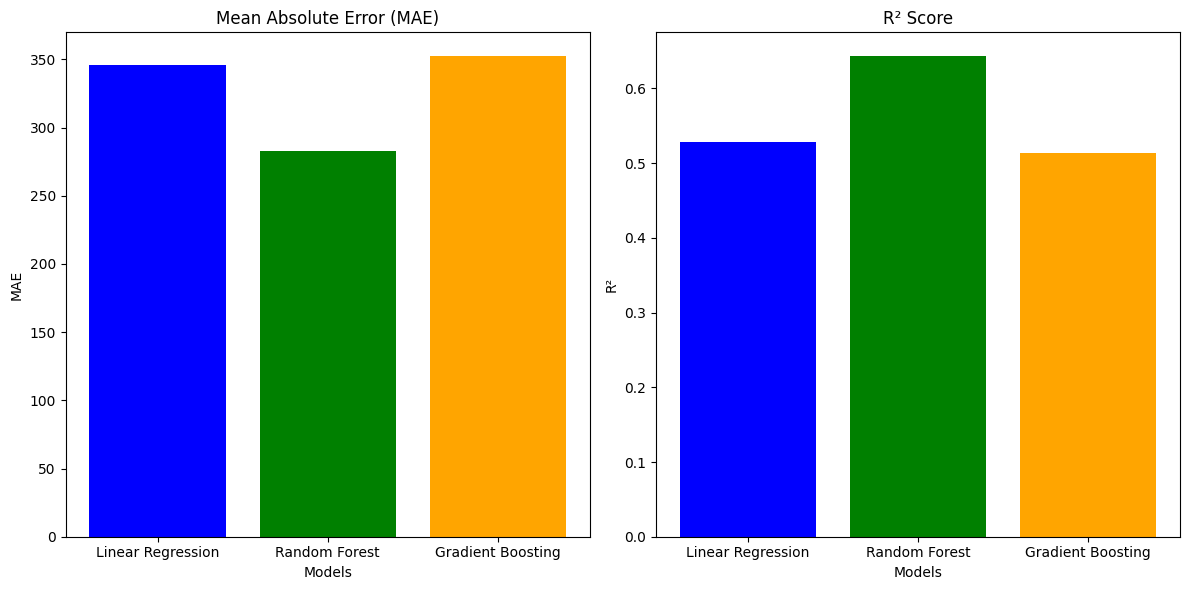

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Evaluate Linear Regression
linear_model_pipeline = joblib.load('/content/drive/MyDrive/FYP B IZZA/linear_regression_pipeline.pkl')
linear_pred = linear_model_pipeline.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Evaluate Random Forest
random_forest_pipeline = joblib.load('/content/drive/MyDrive/FYP B IZZA/random_forest_pipeline.pkl')
rf_pred = random_forest_pipeline.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Evaluate Gradient Boosting
gradient_boosting_pipeline = joblib.load('/content/drive/MyDrive/FYP B IZZA/gradient_boosting_pipeline.pkl')
gb_pred = gradient_boosting_pipeline.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

# Print the MAE and R² scores for each model
print(f"Linear Regression MAE: {linear_mae}, R²: {linear_r2}")
print(f"Random Forest MAE: {rf_mae}, R²: {rf_r2}")
print(f"Gradient Boosting MAE: {gb_mae}, R²: {gb_r2}")

# Bar Graph to Compare Accuracy
models = ["Linear Regression", "Random Forest", "Gradient Boosting"]
mae_scores = [linear_mae, rf_mae, gb_mae]
r2_scores = [linear_r2, rf_r2, gb_r2]

# Create a figure with two subplots for MAE and R²
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# MAE Plot
axes[0].bar(models, mae_scores, color=['blue', 'green', 'orange'])
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].set_xlabel('Models')

# R² Plot
axes[1].bar(models, r2_scores, color=['blue', 'green', 'orange'])
axes[1].set_title('R² Score')
axes[1].set_ylabel('R²')
axes[1].set_xlabel('Models')

# Show the plot
plt.tight_layout()
plt.show()

# Choose the best model based on the lowest MAE
if linear_mae < rf_mae and linear_mae < gb_mae:
    best_model = linear_model_pipeline
    best_model_name = "Linear Regression"
elif rf_mae < linear_mae and rf_mae < gb_mae:
    best_model = random_forest_pipeline
    best_model_name = "Random Forest"
else:
    best_model = gradient_boosting_pipeline
    best_model_name = "Gradient Boosting"

# Save the best model and its name for later use
joblib.dump(best_model, '/content/drive/MyDrive/FYP B IZZA/best_model_pipeline2.pkl')
with open("/content/drive/MyDrive/FYP B IZZA/best_model_name2.txt", "w") as f:
    f.write(best_model_name)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train the linear regression model
lin_reg = LinearRegression().fit(X_train_clean, y_train)

# Predict using the train data
# y_pred = y_baseline
y_pred_train = lin_reg.predict(X_train_clean)

# Calculate mean absolute error
mae_linreg = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_linreg = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_linreg:.4f} and MAE score: {mae_linreg:.4f}")

KeyboardInterrupt: 

In [ ]:
import joblib

# Save Models
joblib.dump(lin_reg, '/content/drive/MyDrive/FYP B IZZA//linear_regression.pkl')

In [ ]:
sns.jointplot(x=y_train, y=y_pred_train);

In [ ]:
#GradientBoosting

from sklearn.ensemble import GradientBoostingRegressor
# Build random forest
grad_tree = GradientBoostingRegressor(random_state = 123)

In [ ]:
# Fit random forest
grad_tree.fit(X_train_clean, y_train)

In [ ]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)
# y_pred_test = grad_tree.predict(X_test_clean)

# Calculate mean absolute error
mae_gb = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_gb = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_gb:.4f} and MAE score: {mae_gb:.4f}")

In [ ]:
sns.jointplot(x=y_train, y=y_pred_train);

In [ ]:
# Save Models
joblib.dump(grad_tree, '/content/drive/MyDrive/FYP B IZZA/gradient_boosting.pkl')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Build random forest
ran_forest = RandomForestRegressor(n_estimators = 100,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

# Fit random forest
ran_forest.fit(X_train_clean, y_train)

In [ ]:
# Predict
y_pred_train = ran_forest.predict(X_train_clean)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_rf = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_rf:.4f} and MAE score: {mae_rf:.4f}")

In [ ]:
sns.jointplot(x=y_train, y=y_pred_train);

In [ ]:
# Save Models
joblib.dump(ran_forest, '/content/drive/MyDrive/FYP B IZZA/random_forest.pkl')